
![alt text](https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 1")

#  <font color='brown'>Data Analyst Project: Data Wrangling </font> <font color='black'> We Rate Dog</font>
   

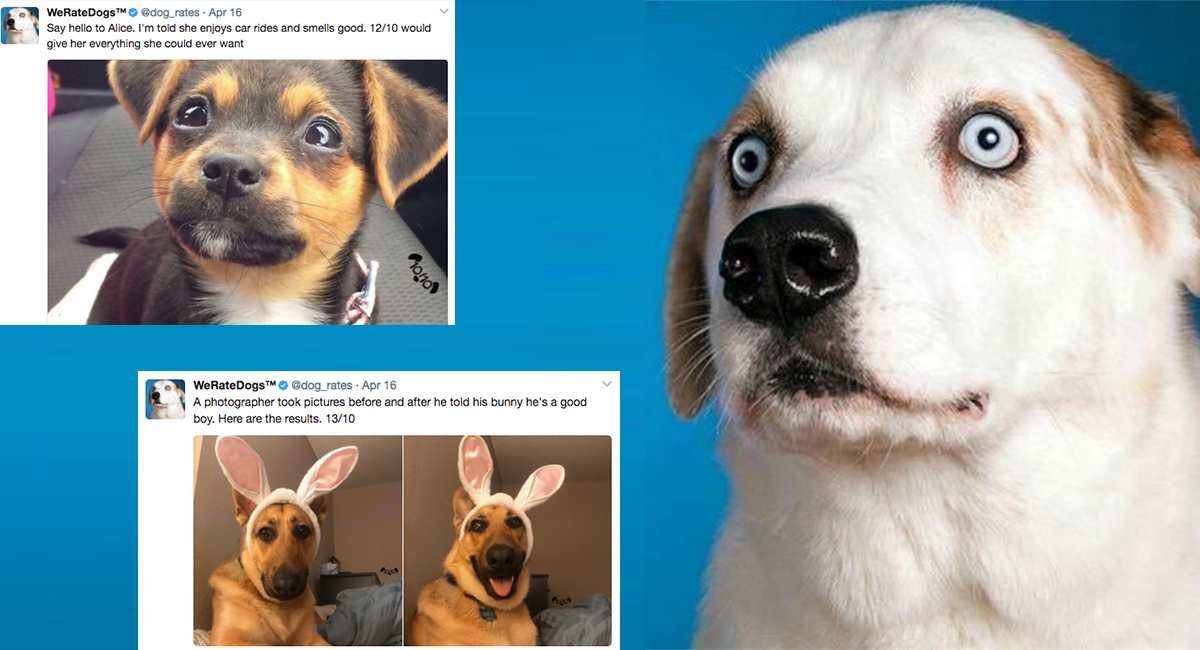

## <font color='brown'>Introduction</font>

Real-world data rarely comes clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. We will document our wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## <font color='brown'>Data Set</font>


Gathering Data for this Project composed from three pieces of data as described below:

The WeRateDogs Twitter archive. We will download this file manually by clicking the following link: 

twitter_archive_enhanced.csv 
WeRateDogs [downloaded their Twitter archive](https://support.twitter.com/articles/20170160) and sent it to Udacity via email exclusively for you to use in this project.

Image url :https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

## <font color='brown'>Software Needed</font>

Software: Python and Jupyter Notebook

The following packages (libraries) need to be installed:

1. pandas
2. NumPy
3. requests
4. tweepy
5. json

### <font color='Red'>**Gathering Data**</font>
___

In [180]:
import pandas as pd
import numpy as np
import requests
import re
import tweepy
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter #maynot this libraries
from IPython.display import Image
import random
import matplotlib
print("success..")

success..


### <font color='blue'>Twitter archive data</font>

Loading csv file format

In [2]:
#loading tweeter archive data set
df_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

### <font color='blue'>Image TSV from Web</font>

loading from web and storing as .tsv

In [3]:

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# Read the downloaded file into a dataframe 'images'
images = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')


### <font color='blue'>Twitter API</font>

Using twitter API

In [4]:
# Personal API keys, secrets, and tokens have been replaced with placeholders
consumer_keys = 'MY CONSUMER KEY'
consumer_secrets = 'MY CONSUMER SECRET'
access_tokens = 'MY ACCESS TOKEN'
access_secrets = 'MY ACCESS SECRET'

In [ ]:
#loading using API

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [7]:
# Construct the API instance
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(),wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [10]:
df_list = []
error_list = []
start = time.time()

# Get the tweet object for all the teweets in archive dataframe 
for tweet_id in df_archive['tweet_id']:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        favorites = page['favorite_count'] # Count favorites tweet
        retweets = page['retweet_count'] # Count of the retweet
        user_followers = page['user']['followers_count'] 
        user_favourites = page['user']['favourites_count'] 
        date_time = page['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)
end = time.time()
print(end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 303


802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
779123168116150273 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code': 144, 'message': 'No status found with that ID.'}]
771004394259247104 _ [{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
770743923962707968 _ [{'code': 144, 'message': 'No status found with that ID.'}]
759566828574212096 _ [{'code': 144, 'message': 'No status found with that ID.'}]
754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
712438159032893441 _ Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/show.json?id=712438159032893441&tweet_mode=extended (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001C0ECFB57B8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))


Rate limit reached. Sleeping for: 423


688804835492233216 _ Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)
680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 432


2789.9380435943604


In [12]:
# lengh of the result
print("result:", len(df_list))
# The tweet_id of the errors
print("errors:", len(error_list))

result: 2329
errors: 27


The lengh of the result 2349

The lengh of the errors 7

From the above results:

> <font color='green'>We reached the limit of the tweepy API twice but wait_on_rate_limit automatically wait for rate limits to replenish and  wait_on_rate_limit_notify print a notification when Tweepy is waiting .The total time was about 1980 seconds (~ 47min)
We could get 2329 tweet_id correctly with 27 errors.</font>

In [13]:

# We repeat the same operation for the tweet_ids that we coudln't get and append the result to df_list
ee_list = []
for e in error_list:
    try:
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        user_followers = page['user']['followers_count']
        user_favourites = page['user']['favourites_count']
        date_time = page['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception:
        print(str(tweet_id)+ " _ " + str(e))
        ee_list.append(e)

In [34]:
print("Querying the errors:", len(df_list))

Querying the errors: 2356


In [15]:
# Create DataFrames from list of dictionaries
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])

# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [17]:
json_tweets = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
json_tweets.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36406,7744,8758025,145375,2017-08-01 16:23:56+00:00
1,892177421306343426,31348,5736,8758025,145376,2017-08-01 00:17:27+00:00
2,891815181378084864,23624,3797,8758025,145376,2017-07-31 00:18:03+00:00
3,891689557279858688,39695,7901,8758025,145376,2017-07-30 15:58:51+00:00
4,891327558926688256,37898,8535,8758025,145376,2017-07-29 16:00:24+00:00


In [18]:
json_tweets.to_csv('tweet_data_api.csv', index = False)


### <font color='Red'>**Assess**</font>
___

### <font color='blue'>Image TSV</font>

In [26]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
#finding no of rows and column
images.shape

(2075, 12)

In [28]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### <font color='blue'>Twitter archive </font>

In [30]:
#finding no rows and column
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [31]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [32]:
df_archive.shape

(2356, 17)

In [33]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### <font color='blue'>Twitter API</font>

In [22]:
df_tweet_api = pd.read_csv("tweet_data_api.csv")
df_tweet_api.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36406,7744,8758025,145375,2017-08-01 16:23:56+00:00
1,892177421306343426,31348,5736,8758025,145376,2017-08-01 00:17:27+00:00
2,891815181378084864,23624,3797,8758025,145376,2017-07-31 00:18:03+00:00
3,891689557279858688,39695,7901,8758025,145376,2017-07-30 15:58:51+00:00
4,891327558926688256,37898,8535,8758025,145376,2017-07-29 16:00:24+00:00


In [23]:
df_tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2356 non-null   int64 
 1   favorites        2356 non-null   int64 
 2   retweets         2356 non-null   int64 
 3   user_followers   2356 non-null   int64 
 4   user_favourites  2356 non-null   int64 
 5   date_time        2356 non-null   object
dtypes: int64(5), object(1)
memory usage: 110.6+ KB


In [24]:
df_tweet_api.shape

(2356, 6)

In [25]:
df_tweet_api.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.356000e+03,2356.000000,2356.000000,2.356000e+03,2356.000000
mean,7.410733e+17,7546.166808,2694.686333,8.758033e+06,145375.103565
std,6.833670e+16,11745.077076,4580.710549,8.884721e+00,0.342794
min,6.660209e+17,0.000000,1.000000,8.758011e+06,145374.000000
25%,6.773308e+17,1350.250000,534.000000,8.758025e+06,145375.000000
50%,7.164431e+17,3277.500000,1244.000000,8.758031e+06,145375.000000
75%,7.982426e+17,9168.000000,3125.250000,8.758042e+06,145375.000000
max,8.924206e+17,157151.000000,78290.000000,8.758056e+06,145376.000000


In [37]:
print(df_archive['text'][900])
print(df_archive['name'][12])

Meet Boston. He's worried because his tongue won't fit all the way in his mouth. 12/10 it'll be ok deep breaths pup https://t.co/rfWQ4T9iQj
None


In [38]:
df_archive['rating_numerator'].value_counts()
df_archive['rating_denominator'].value_counts()
df_archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Tayzie        1
Dook          1
Mack          1
Jerome        1
Flurpson      1
Name: name, Length: 957, dtype: int64

In [52]:
df_archive['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

(9, 20)

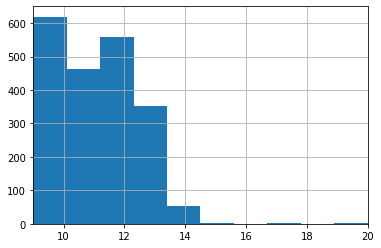

In [55]:
df_archive['rating_numerator'].hist(bins=10, range=(9,20))
plt.xlim((9,20))

In [56]:
df_archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

## Quality

1. Removing retweets
2. Changing tweet id as str
3. Changing time stamp to date time object
4. Sorting issues with name
5. Remove rows with no images url
6. Display text column in full
7. Change missing values in name from None
8. Remove extra character after & in twitter archive
9. Count number of source
10. Change data type of various rows
11. Find Dog gender
12. finding popular dog breeds

### Tidiness

1. All tables should be part of one dataset
2. Dog "stage" variable in four columns: doggo, floofer, pupper, puppo


### <font color='Red'>**Cleaning Data**</font>

___

# Start from here

Copies of the original pieces of data are made prior to cleaning.

A tidy master dataset (or datasets, if appropriate) with all pieces of gathered data is created.

In [247]:

# Make copies for cleaning to keep original files untouched
df_archive_clean = df_archive.copy()
image_clean = images.copy()
tweet_api_clean = df_tweet_api.copy()

# <font color='brown'>Tidiness</font>

### <font color='green'>1. All tables should be part of one dataset</font>

In [248]:
#let's merge data set
df_master = pd.merge(df_archive_clean , image_clean, how = 'left', on = ['tweet_id'] )
df_master = pd.merge(df_master, tweet_api_clean, how = 'left', on = ['tweet_id'])
df_master.to_csv('df_master.csv', encoding = 'utf-8')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2383 entries, 0 to 2382
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2383 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2383 non-null   object 
 4   source                      2383 non-null   object 
 5   text                        2383 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2324 non-null   object 
 10  rating_numerator            2383 non-null   int64  
 11  rating_denominator          2383 non-null   int64  
 12  name                        2383 non-null   object 
 13  doggo                       2383 

In [249]:
#let's copy the master copy in df data frame
df = df_master.copy(deep=True)

In [250]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.085851,False,banana,0.076110,False,36406.0,7744.0,8758025.0,145375.0,2017-08-01 16:23:56+00:00
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.090647,True,papillon,0.068957,True,31348.0,5736.0,8758025.0,145376.0,2017-08-01 00:17:27+00:00
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.078253,True,kelpie,0.031379,True,23624.0,3797.0,8758025.0,145376.0,2017-07-31 00:18:03+00:00
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.168086,True,spatula,0.040836,False,39695.0,7901.0,8758025.0,145376.0,2017-07-30 15:58:51+00:00
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.225770,True,German_short-haired_pointer,0.175219,True,37898.0,8535.0,8758025.0,145376.0,2017-07-29 16:00:24+00:00


In [251]:
len(df)

2383

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2383 entries, 0 to 2382
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2383 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2383 non-null   object 
 4   source                      2383 non-null   object 
 5   text                        2383 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2324 non-null   object 
 10  rating_numerator            2383 non-null   int64  
 11  rating_denominator          2383 non-null   int64  
 12  name                        2383 non-null   object 
 13  doggo                       2383 

### <font color='green'>2. One column for dog stages</font>

In [253]:
#Extract dog stages from 'text' column into new 'dog_stage' column 
df['dog_stage'] = df['text'].str.extract('(doggo|floofer|pupper|puppo)')
df[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head()

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None


In [254]:
# Drop doggo, floofer, pupper, and puppo columns
df = df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2383 entries, 0 to 2382
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2383 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2383 non-null   object 
 4   source                      2383 non-null   object 
 5   text                        2383 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2324 non-null   object 
 10  rating_numerator            2383 non-null   int64  
 11  rating_denominator          2383 non-null   int64  
 12  name                        2383 non-null   object 
 13  jpg_url                     2102 

# <font color='brown'>Quality</font>

### <font color='green'>1. Removing retweets</font>

In [256]:
df = df[np.isnan(df.retweeted_status_id)] #where 'retweeted_status_id' is a NaN 

"""
Check info to determine all there are no non-null entries for
retweeted_status_id', 'retweeted_status_user_id' and 
'retweeted_status_timestamp'
"""
#lets drop unwanted column from  Nepal data frame using index base method
df.drop(df.columns[[6, 7, 8,]], axis = 1, inplace = True) 

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 0 to 2382
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2202 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2202 non-null   object 
 4   source                 2202 non-null   object 
 5   text                   2202 non-null   object 
 6   expanded_urls          2144 non-null   object 
 7   rating_numerator       2202 non-null   int64  
 8   rating_denominator     2202 non-null   int64  
 9   name                   2202 non-null   object 
 10  jpg_url                2021 non-null   object 
 11  img_num                2021 non-null   float64
 12  p1                     2021 non-null   object 
 13  p1_conf                2021 non-null   float64
 14  p1_dog                 2021 non-null   object 
 15  p2  

### <font color='green'>2. Changing tweet id as str/obj from int</font>

In [258]:
df['tweet_id'].astype(str)

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2378    666020888022790149
2379    666020888022790149
2380    666020888022790149
2381    666020888022790149
2382    666020888022790149
Name: tweet_id, Length: 2202, dtype: object

In [259]:
df["tweet_id"]

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2378    666020888022790149
2379    666020888022790149
2380    666020888022790149
2381    666020888022790149
2382    666020888022790149
Name: tweet_id, Length: 2202, dtype: int64

### <font color='green'>3. Changing time stamp to date time object</font>

In [260]:
df['timestamp'] = df['timestamp'].str.slice(start=0, stop=-6)
df['timestamp'] = pd.to_datetime(df['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [261]:
df['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2378   2015-11-15 22:32:08
2379   2015-11-15 22:32:08
2380   2015-11-15 22:32:08
2381   2015-11-15 22:32:08
2382   2015-11-15 22:32:08
Name: timestamp, Length: 2202, dtype: datetime64[ns]

### <font color='green'>4.  Various issues with 'name'</font>


In [262]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in df['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [263]:
# Replace all names that start with a lowercase letter with a NaN
df['name'].replace(lowercase_names,np.nan,inplace = True)

# Replace all 'None's with a NaN
df['name'].replace('None', np.nan,inplace = True)

# Replace the name 'O' with "O'Malley" 
df['name'].replace('O', "O'Malley",inplace = True)

In [264]:
df['name'].value_counts()

Lucy        11
Charlie     11
Oliver      10
Cooper      10
Penny       9 
           .. 
Clarkus     1 
Tove        1 
Fillup      1 
Jennifur    1 
Jamesy      1 
Name: name, Length: 930, dtype: int64

### <font color='green'>5. Remove rows where there are no images (expanded_urls).</font>


In [265]:
df.dropna(subset=['expanded_urls'],inplace=True)

In [266]:
sum(df['expanded_urls'].isnull())

0

### <font color='green'>6. Display Text column in full</font>


In [267]:
pd.set_option('display.max_colwidth', 1)

In [268]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,date_time,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,...,False,banana,0.076110,False,36406.0,7744.0,8758025.0,145375.0,2017-08-01 16:23:56+00:00,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,...,True,papillon,0.068957,True,31348.0,5736.0,8758025.0,145376.0,2017-08-01 00:17:27+00:00,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,...,True,kelpie,0.031379,True,23624.0,3797.0,8758025.0,145376.0,2017-07-31 00:18:03+00:00,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,...,True,spatula,0.040836,False,39695.0,7901.0,8758025.0,145376.0,2017-07-30 15:58:51+00:00,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,...,True,German_short-haired_pointer,0.175219,True,37898.0,8535.0,8758025.0,145376.0,2017-07-29 16:00:24+00:00,NaN


### <font color='green'>7. Change missing values in 'name' from 'None' to NaN (dog stages already covered).</font>

In [269]:
df['name'] = df['name'].replace('None', np.NaN)

In [270]:
df['name']

0       Phineas 
1       Tilly   
2       Archie  
3       Darla   
4       Franklin
          ...   
2378    NaN     
2379    NaN     
2380    NaN     
2381    NaN     
2382    NaN     
Name: name, Length: 2144, dtype: object

### <font color='green'>8. Remove extra characters after '&' in twitter_archive 'text'.</font>


In [271]:
df['text'] = df['text'].str.replace('&amp;', '&')

In [272]:
df[df.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,date_time,dog_stage


### <font color='green'>9. Count number of source.</font>


In [273]:
df['source'] = df['source'].astype('category')

In [274]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2012
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     30  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [275]:
print("Twitter for iphone:", 2012)
print("Via Make a scene:", 91)
print("Twitter Web Client:", 30)
print("Tweet deck:", 11)

Twitter for iphone: 2012
Via Make a scene: 91
Twitter Web Client: 30
Tweet deck: 11


### <font color='green'>10. Change datatypes</font>

Change datatypes of timestamp to datetime, dog_stage to categorical, and tweet_id, in_reply_to_status_id, and in_reply_to_user_id to strings.

In [276]:
df['dog_stage'] = df['dog_stage'].astype('category')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['tweet_id'] = df['tweet_id'].astype('str')
df['in_reply_to_status_id'] = df['in_reply_to_status_id'].astype('str')
df['in_reply_to_user_id'] = df['in_reply_to_user_id'].astype('str')

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2382
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2144 non-null   object        
 1   tweet_date          2144 non-null   datetime64[ns]
 2   source              2144 non-null   category      
 3   text                2144 non-null   object        
 4   expanded_urls       2144 non-null   object        
 5   rating_numerator    2144 non-null   int64         
 6   rating_denominator  2144 non-null   int64         
 7   name                1391 non-null   object        
 8   jpg_url             2021 non-null   object        
 9   favorites           2135 non-null   float64       
 10  retweets            2135 non-null   float64       
 11  user_followers      2135 non-null   float64       
 12  date_time           2135 non-null   object        
 13  dog_stage           356 non-null    category    

### <font color='green'>11. Finding Dog Gender</font>

In [277]:
#Male dogs
male = ['He', 'he', 'Him', 'him','Him','His', 'his', 'Himself', 'himself', "He's", "he's", 'boy']
#Female dogs
female = ['She', 'she', 'Her', 'her', 'Hers', 'hers', 'Herself', 'herself', "She's", "she's", 'girl']


dog_gender = []

for text in df['text']:
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    else:
        dog_gender.append('NaN')



df['dog_gender'] = dog_gender

In [278]:
df['dog_gender'].value_counts()

male      1054
NaN       744 
female    346 
Name: dog_gender, dtype: int64

In [279]:
df.loc[df['dog_gender'] == 'NaN', 'dog_gender'] = None


In [280]:
df['dog_gender'] = df['dog_gender'].astype('category')

### <font color='green'>12. Finding Dog breeds</font>

In [281]:
prediction_algorithm = []
confidence_level = []

# Get_prediction_confidence function:
# search the first true algorithm and append it to a list with it's level of confidence
# if flase prediction_algorthm will have a value of NaN
def get_prediction_confidence(df):
    if df['p1_dog'] == True:
        prediction_algorithm.append(df['p1'])
        confidence_level.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        prediction_algorithm.append(df['p2'])
        confidence_level.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        prediction_algorithm.append(df['p3'])
        confidence_level.append(df['p3_conf'])
    else:
        prediction_algorithm.append('NaN')
        confidence_level.append(0)

df.apply(get_prediction_confidence, axis=1)
df['prediction_algorithm'] = prediction_algorithm
df['confidence_level'] = confidence_level

# Test
list(df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'date_time',
 'dog_stage',
 'dog_gender',
 'prediction_algorithm',
 'confidence_level']

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2382
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2144 non-null   object        
 1   in_reply_to_status_id  2144 non-null   object        
 2   in_reply_to_user_id    2144 non-null   object        
 3   timestamp              2144 non-null   datetime64[ns]
 4   source                 2144 non-null   category      
 5   text                   2144 non-null   object        
 6   expanded_urls          2144 non-null   object        
 7   rating_numerator       2144 non-null   int64         
 8   rating_denominator     2144 non-null   int64         
 9   name                   1391 non-null   object        
 10  jpg_url                2021 non-null   object        
 11  img_num                2021 non-null   float64       
 12  p1                     2021 non-null   object        
 13  p1_

In [282]:

#lets drop unwanted column from  Nepal data frame using index base method
df.drop(df.columns[[1,2,11,12,13,14,15,16,17,18,19,20,24]], axis = 1, inplace = True) 

In [283]:
df.apply(lambda x: len(x.unique()))

tweet_id                2117
timestamp               2117
source                  4   
text                    2117
expanded_urls           2116
rating_numerator        34  
rating_denominator      15  
name                    931 
jpg_url                 1995
favorites               1936
retweets                1644
user_followers          28  
date_time               2109
dog_stage               5   
dog_gender              3   
prediction_algorithm    114 
confidence_level        1684
dtype: int64

In [294]:
df = df.rename(columns = {'timestamp': 'tweet_date','prediction_algorithm' : 'dog_breed'})

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2382
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2144 non-null   object        
 1   tweet_date          2144 non-null   datetime64[ns]
 2   source              2144 non-null   category      
 3   text                2144 non-null   object        
 4   expanded_urls       2144 non-null   object        
 5   rating_numerator    2144 non-null   int64         
 6   rating_denominator  2144 non-null   int64         
 7   name                1391 non-null   object        
 8   jpg_url             2021 non-null   object        
 9   favorites           2135 non-null   float64       
 10  retweets            2135 non-null   float64       
 11  user_followers      2135 non-null   float64       
 12  date_time           2135 non-null   object        
 13  dog_stage           356 non-null    category    


### <font color='Red'>**Storing and Acting on Wrangled Data**</font>
___


The master dataset is analyzed using pandas or SQL in the Jupyter Notebook and at least three (3) separate insights are produced.

In [303]:

# Save clean DataFrame to csv file
df.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')



### <font color='Red'>**Visualize Data**</font>
___


In [304]:
df_data = pd.read_csv("twitter_archive_master.csv")

In [305]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2144 non-null   int64  
 1   tweet_date          2144 non-null   object 
 2   source              2144 non-null   object 
 3   text                2144 non-null   object 
 4   expanded_urls       2144 non-null   object 
 5   rating_numerator    2144 non-null   int64  
 6   rating_denominator  2144 non-null   int64  
 7   name                1391 non-null   object 
 8   jpg_url             2021 non-null   object 
 9   favorites           2135 non-null   float64
 10  retweets            2135 non-null   float64
 11  user_followers      2135 non-null   float64
 12  date_time           2135 non-null   object 
 13  dog_stage           356 non-null    object 
 14  dog_gender          1400 non-null   object 
 15  dog_breed           1713 non-null   object 
 16  confid

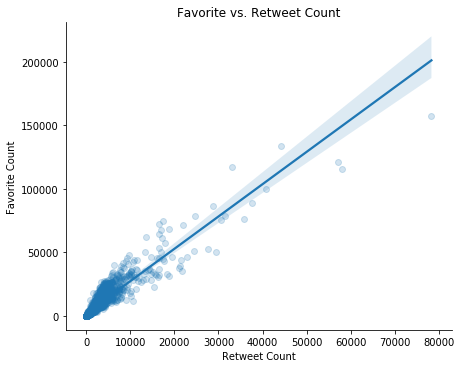

In [306]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweets", 
           y="favorites", 
           data=df_data,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

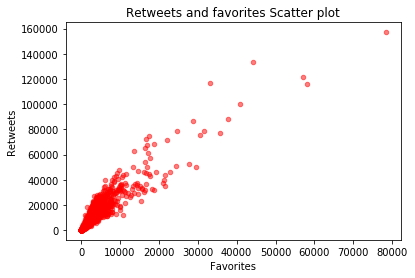

In [307]:
df_data.plot(kind = 'scatter', x = 'retweets', y = 'favorites', alpha = 0.5, color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

As the correlation map shows if the count of retweet is high the count of favorites go high

Text(0, 0.5, 'dog_breeds ')

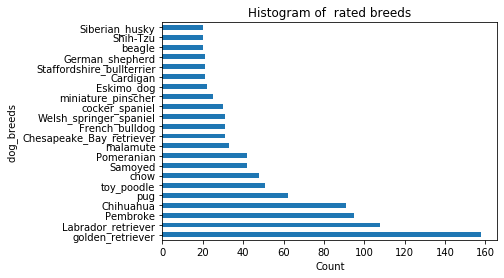

In [308]:
df_breed = df_data.groupby('dog_breed').filter(lambda x: len(x) >= 20)

df_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of  rated breeds')
plt.xlabel('Count')
plt.ylabel('dog_breeds ')

Top two famous breeds are : Golden_retriver and Labrador_retriver 

Text(0.5, 1.0, 'Dog Gender Pie chart')

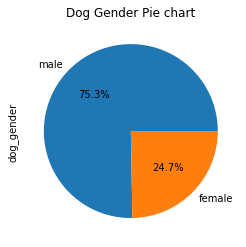

In [309]:
# Plot the data partitioned by dog gender
df_data[df_data['dog_gender'].notnull()]['dog_gender'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Dog Gender Pie chart')

([<matplotlib.patches.Wedge at 0x1c0eec3bc88>,
 [Text(-1.0981177580127635, -0.6957998200179574, 'pupper'),
  Text(1.1553764006330958, 0.32419958800114507, 'doggo'),
  Text(0.38489144855934426, 1.1365995657336359, 'puppo'),
  Text(0.042349567644618495, 1.1992524813901009, 'floofer')])

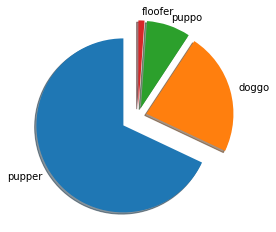

In [240]:
dog_stage_count = list(df_data[df_data['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df_data[df_data['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)

We can see pupper has more space on chart on dog_stage

### <font color='brown'>Insights</font>

1. Pupper is popular on dog stage chart.
2. Golden_retriver followed by Labrador_retriver are two most popular dog breed.
3. correlation map shows if the count of retweet is high the count of favorites go high.
4. Male gender is more popular than female dog.

# <font color='purple'>THANK YOU</font>